# Movie Recommender System
## (Self-Guided Project)

## by Justin Sierchio

In this project, we will be looking at usng TMDB data for constructing a movie recommender system. These systems work by utilizing rating or user preference data to make recommendations. They are a form of information filter systems.

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/tmdb/tmdb-movie-metadata/download. More information related to the dataset can be found at: https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system.

Note: this is a self-guided project following the tutorial provided by Ibtesam Ahmed at Kaggle.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df1=pd.read_csv('tmdb_5000_credits.csv');
df2=pd.read_csv('tmdb_5000_movies.csv');

print('Datasets uploaded!');

Datasets uploaded!


Let's display the first 5 rows for each of these datasets.

In [3]:
# Display 1st 5 rows of TMDB movie dataset
df1.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
# Display 1st 5 rows of TMDB credit dataset
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Let's give a listing what all the columns in these datasets represent.

The first dataset contains the following features:
<ul>
    <li>movie_id - A unique identifier for each movie.</li>
    <li>cast - The name of lead and supporting actors.</li>
    <li>crew - The name of Director, Editor, Composer, Writer etc.</li>
</ul>

The second dataset has the following features:
<ul>
    <li>budget - The budget in which the movie was made.</li>
    <li>genre - The genre of the movie, Action, Comedy ,Thriller etc.</li>
    <li>homepage - A link to the homepage of the movie.</li>
    <li>id - This is infact the movie_id as in the first dataset.</li>
    <li>keywords - The keywords or tags related to the movie.</li>
    <li>original_language - The language in which the movie was made.</li>
    <li>original_title - The title of the movie before translation or adaptation.</li>
    <li>overview - A brief description of the movie.</li>
    <li>popularity - A numeric quantity specifying the movie popularity.</li>
    <li>production_companies - The production house of the movie.</li>
    <li>production_countries - The country in which it was produced.</li>
    <li>release_date - The date on which it was released.</li>
    <li>revenue - The worldwide revenue generated by the movie.</li>
    <li>runtime - The running time of the movie in minutes.</li>
    <li>status - "Released" or "Rumored".</li>
    <li>tagline - Movie's tagline.</li>
    <li>title - Title of the movie.</li>
    <li>vote_average - average ratings the movie recieved.</li>
    <li>vote_count - the count of votes recieved.</li>
</ul>

## Data Cleaning

To begin, let's merge these two datasets together by joining them along the 'id' column.

In [5]:
# Join Datasets together along 'id' column
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

Let's take a look at the resulting join.

In [6]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


As we can see, the datasets have been joined along the 'id' column.

## Data Filtering by Demographic

In order to filter by demographic, we will need to be able to evaluate the following:
<ul>
    <li> metric score (rating) for each film</li>
    <li> calculate the score for each film</li>
    <li> sort the film ratings and recommend the best rated film for the user</li>
</ul>

In order make sure that the ratings are legitimate (movies with more votes are given a higher weight), we will use the weighting rating formula for IMDB. 

https://image.ibb.co/jYWZp9/wr.png

where in the formula above:
<ul>
    <li> v = # of votes for the movie</li>
    <li> m = minimum votes required to be listed on the chart</li>
    <li> R = average rating of the movie</li>
    <li> C = mean vote across the whole report</li>
</ul>

Using the dataset, we already have calculated v (vote count) and R (average rating). Hence C can be calculated easily.

In [7]:
# Calculate Mean Vote Rating across the entire TMDB dataset.
C= df2['vote_average'].mean()
C

6.092171559442011

So for the entire set, the average film gets a 6/10. Now we will need to establish a cutoff. In other words, what minimum score will the system need in order to recommmend a film? Let's say 90%.

In [8]:
# Show the number of filmes that meet a 90% vote count threshold
m = df2['vote_count'].quantile(0.9);
m

1838.4000000000015

Now let us filter out the movies that meet our criteria.

In [9]:
# Create subset that has films that meet our earlier defined criteria
q_movies = df2.copy().loc[df2['vote_count'] >= m];
q_movies.shape

(481, 23)

So this tells us that there are 483 films that meet our criteria. Now, we need to calculate our metric for each qualified movie. This will require defining a function which we will call "weighted_rating()" as well as defining a new feature score (for which we will calculate the value by applying this function to our DataFrame of qualified movies).

In [10]:
# Create a Function called 'Weighted Rating'
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Define new feature score by applying 'Weighted Rating' function
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Now let us sort the DataFrame based on the score feature. We will display the output as the title, vote count, vote average and weighted rating for the top 10 movies meeting this criteria.

In [12]:
# Sort movies based on new 'Feature Score'
q_movies = q_movies.sort_values('score', ascending=False)

# Display the Top 10 movies meeting our criteria
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


At this juncture, we have a very basic recommending system. However, there is more to be done!

Let us suppose we want to see popular trending movies. We can accomplish this task by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

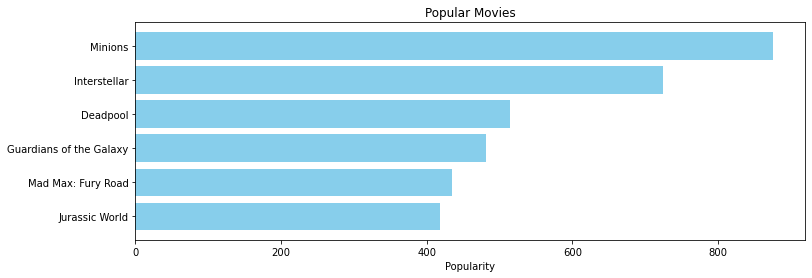

In [13]:
# Find the trending popular films and display them on a bar chart

# Find the trending popular films
pop= df2.sort_values('popularity', ascending=False)

# Import the needed libray
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

At this point, we should note we have created a chart for generic users. For specific kinds of users, we will need to employ Content-Based Filtering.

## Data Filtering by Content

Here, we wil use the content of the film (i.e. overview, cast, crew, keywords) to find similar films and then recommend them.

### Plot Recommendation

Using pairwise similarity scores based on plot descriptions, we will recommend films. Plot descriptions are displayed in the overview feature of our dataset. Below is an example.

In [14]:
# Display the 1st 10 plot descriptions for our film dataset
df2['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

We will now use a technique called "Term Frequency-Inverse Document Frequency" (TD-IDF) vectors for each overview. Simply put, we will find the frequency of a word in a document. This will eventually allow us to find films with similar TD-IDF scores using the Scikit-Learn library.

In [15]:
# Import Necessary Library 
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object, removing all stop words (i.e. 'a', 'the')
tfidf = TfidfVectorizer(stop_words='english')

# Replace any NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

# Construct TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

The result shows we have over 20,000 words that can describe the 4800 films in our dataset. 

Now let's compute a similarity score. While there are several different methods that we can use (i.e. euclidean, Pearson Correlation Coefficient, cosine similarity) we will use the cosine similarity for this exercise.

https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d

Use of the TD-IDF vectorizer means that the dot product will give us the cosine similarity score. Therefore, we will use Scikit Learns's linear_kernel() instead of cosine_similarities() due to speed.

In [16]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Now we are going to define a function that takes a movie title and outputs a list of the 10 most similar films. To begin we need a system to identify the index of a movie in our metadata DataFrame given the title.

In [17]:
# Construct a reverse map of indices and film titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

We can now define our recommendation system, which will use the following steps:

<ul>
    <li>Find the index of the film for a given title.</li>
    <li>Find the list of cosine similarity scores for that movie compared to all films. The list will then be converted into a tuple list where the elements are (position, score).</li>
    <li>Sort the list of tuples based on teh second element (the cosine similarity score).</li>
    <li>Obtain the top 10 elements from the list, ignoring the first element (position).</li>
    <li>Display the titles corresponding to the indices of those top elements</li>

In [18]:
# Create Recommendations Function
def get_recommendations(title, cosine_sim=cosine_sim):
    # Find the index value that matches the title
    idx = indices[title]

    # Find the cosine similarity scores for that film compared to all others
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the films based upon the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtain the scores for the top 10 films
    sim_scores = sim_scores[1:11]

    # Find the indices for those top 10 films
    movie_indices = [i[0] for i in sim_scores]

    # Display the titles for the top 10 films based upon the respective indices
    return df2['title'].iloc[movie_indices]

Now let's run the code for a given film.

In [20]:
# Run the recommendation function for a given film
get_recommendations('Superman')

870                          Superman II
10                      Superman Returns
2433    Superman IV: The Quest for Peace
914                 Central Intelligence
4659                          Horse Camp
2527         National Lampoon's Vacation
3542                                R100
45                           World War Z
1368                      Identity Thief
1237                  The Out-of-Towners
Name: title, dtype: object

Let's try with a different film.

In [22]:
# Run the recommendation function for a given film
get_recommendations('Live and Let Die')

3143            You Only Live Twice
1743                      Octopussy
2675           The Spy Who Loved Me
1343          Never Say Never Again
4339                         Dr. No
1713             For Your Eyes Only
1586               A View to a Kill
2466                   See Spot Run
3696    Four Weddings and a Funeral
4300                 Reservoir Dogs
Name: title, dtype: object

The results are mixed. While the 'Superman' result returned some other Superman films, it is questionable whether a user would want to see a comedy film like 'Identity Thief.' The results for the 'Live and Let Die' film appears to be a better match, displaying several other James Bond franchise films.

### Credit, Genre and Keyword Recommendation

With more targeted metadata, we can arrive at a more accurate recommendation system. In this section, we will attempt to build such a system using criteria of the (a) top 3 actors (b) director (c) related genres and (d) movie plot keywords.

To begin, we will need to extract those criteria from the cast, crew and keyword features. Let us convert the data structure.

In [23]:
# Parse string-like features into corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Next, let us write functions to extract the information we seek.

In [24]:
# Obtain director name (or return NaN if not available)
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [25]:
# Obtain top 3 actors (or all if there are 3 or less)
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    # Return empty list in case of missing/malformed data
    return []

Now we will put the data into a more easily understood form.

In [26]:
# Create a function to better define the director, cast, genres and keywords features
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

Now that we have our functions, let's test our the feature to make sure they work.

In [27]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In order to prevent names from being counted twice (i.e. Bruce Boxleitner and Bruce Campbell), we will convert the names and keyword instances into lowercase and strip all the spaces between them.

In [28]:
# Convert all strings to lowercase and remove spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [29]:
# Apply clean_data function to features
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Now we can create our "metadata soup" -- a string that contains all the metadata to input into our function set (namely actors, director and keywords).

In [30]:
# Create soup function
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

Now we will repeat similar steps like we did for the TD-IDF function, only now we are using the 'CountVectorizer' function.

In [31]:
# Import needed libraries and create count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [32]:
# Compute cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [33]:
# Reset index of our main DataFrame as previously done
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

Now let's try running some queries with the new recommendation system.

In [38]:
get_recommendations('The Prince of Tides', cosine_sim2)

1128    The Mirror Has Two Faces
2825                       Yentl
3078            Peaceful Warrior
4247       Me You and Five Bucks
663              We Are Marshall
712             Any Given Sunday
1545         Remember the Titans
1840               The Lucky One
2701             Little Children
2706          Jefferson in Paris
Name: title, dtype: object

In [39]:
get_recommendations('Dr. No', cosine_sim2)

3143                   You Only Live Twice
4071                 From Russia with Love
245                    Tomorrow Never Dies
1713                    For Your Eyes Only
2675                  The Spy Who Loved Me
3162                           Thunderball
3351           The Man with the Golden Gun
3251       On Her Majesty's Secret Service
134     Mission: Impossible - Rogue Nation
425                    Mission: Impossible
Name: title, dtype: object

It appears that we are getting better results. Fantastic!